##### usage of yolo for getting labels only

##### lib and function def

In [1]:
import cv2
import torch
from PIL import Image
import cv2
import torch
from PIL import Image
import glob
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.image as mpimg
import os
from pyzbar.pyzbar import decode
from pyzbar import pyzbar
import cv2
import glob
from tqdm import tqdm
from barcode import EAN13
from barcode.writer import ImageWriter
import matplotlib.pyplot as plt

import cv2
import torch
from PIL import Image


%matplotlib inline

## Objects:
#1. Label
class Label:
    def __init__(self,  boundPoints = None, labelImage = None, originCoordinate = None):
        self.boundPoints = boundPoints
        self.labelImage = labelImage
        self.originCoordinate = originCoordinate
        self.barcodeReadStatus = False
    
        #magnified 
        self.magnifiedImage = None
        self.magnificationFactor = 1
        
        #binarized image
        self.binarizedImage = None

        #decoded barcode
        self.barcodeList = []
        
        #bounding box
        self.boundingBox = None
        

#### files and model loading

In [2]:
files = glob.glob('./Dataset_for_training//*.png')
print(len(files))
another_files = glob.glob('./Dataset_for_training/*.jpg')

for file in another_files:
    files.append(file)
    
    
print(len(files))

0
107


In [3]:
#Model loading
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./weights/barcode/exp3/weights/best.pt')
model.iou = 0.1
print(type(model))

Using cache found in C:\Users\Quadrep/.cache\torch\hub\ultralytics_yolov5_master
Fusing layers... 
C:\Users\Quadrep\miniconda3\envs\yolov5\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
Adding AutoShape... 
YOLOv5  2021-6-27 torch 1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24576.0MB)



<class 'models.common.AutoShape'>


In [6]:
class ImageFile:
    def __init__(self, image = None):
        self.image = image
        self.results = []
        self.stickers = []

In [7]:
'''
plt.imshow(cv2.imread(files[0])[:,:,::-1])


img2 = cv2.imread(files[0])
#img2.shape
test_image = img2[:,:,::-1]
plt.imshow(img2)
plt.show()
plt.imshow(test_image)
plt.show()

img2 = cv2.imread(files[0])  # OpenCV image (BGR tofiles[0] RGB)'''



imgs = []  # batch of images

for file in files:
    imgs.append(ImageFile(cv2.imread(file)))

for i in range (len(imgs)):
    imgs[i].image = cv2.cvtColor(imgs[i].image, cv2.COLOR_BGR2RGB)
    
for i in range (len(imgs)):
    imgs[i].results = model(np.copy(imgs[i].image))
   
for i in range (len(imgs)):
    imgs[i].results.save()
    df = imgs[i].results.pandas().xyxy[0]
    
    if (len(df) >0):
        for j in range (len(df)):
            xmin = int(df.iloc[j].xmin)
            ymin = int(df.iloc[j].ymin)
            xmax = int(df.iloc[j].xmax)
            ymax = int(df.iloc[j].ymax)
            imgs[i].stickers.append(imgs[i].image[ymin:ymax,xmin:xmax])
    
#Collect all stickers from all images
sticker_list = []

for img in imgs:
    for sticker in img.stickers:
        sticker_list.append(sticker)

#check before output  
print(len(sticker_list))
print(type(sticker_list[0]))

Saved image0.jpg to runs\hub\exp80
Saved image0.jpg to runs\hub\exp81
Saved image0.jpg to runs\hub\exp82
Saved image0.jpg to runs\hub\exp83
Saved image0.jpg to runs\hub\exp84
Saved image0.jpg to runs\hub\exp85
Saved image0.jpg to runs\hub\exp86
Saved image0.jpg to runs\hub\exp87
Saved image0.jpg to runs\hub\exp88
Saved image0.jpg to runs\hub\exp89
Saved image0.jpg to runs\hub\exp90
Saved image0.jpg to runs\hub\exp91
Saved image0.jpg to runs\hub\exp92
Saved image0.jpg to runs\hub\exp93
Saved image0.jpg to runs\hub\exp94
Saved image0.jpg to runs\hub\exp95
Saved image0.jpg to runs\hub\exp96
Saved image0.jpg to runs\hub\exp97
Saved image0.jpg to runs\hub\exp98
Saved image0.jpg to runs\hub\exp99
Saved image0.jpg to runs\hub\exp100
Saved image0.jpg to runs\hub\exp101
Saved image0.jpg to runs\hub\exp102
Saved image0.jpg to runs\hub\exp103
Saved image0.jpg to runs\hub\exp104
Saved image0.jpg to runs\hub\exp105
Saved image0.jpg to runs\hub\exp106
Saved image0.jpg to runs\hub\exp107
Saved image0

In [9]:
pwd

'C:\\Users\\Quadrep\\Desktop\\yolov5-tinymetal'

In [19]:
# convert to RGB
for i in range (len(sticker_list)):
    try:
        #sticker[i] = cv2.cvtColor(sticker[i], cv2.COLOR_BGR2RGB)
        sticker[i] = sticker[i][:,:,::-1]
    except:
        continue
    
#outputting result
i = 0
prefix = ''
for sticker in tqdm(sticker_list):
    
    if (i < 10):
        prefix = '00'
    elif (i < 100):
        prefix = '0'
    elif (i>100):
        prefix = ''
        
    cv2.imwrite('./Stickers/sticker_'+prefix+str(i)+'.jpg',sticker[:,:,::-1])
    i+=1

100%|███████████████████████████████████████████████████████████████████████████████| 418/418 [00:04<00:00, 103.83it/s]


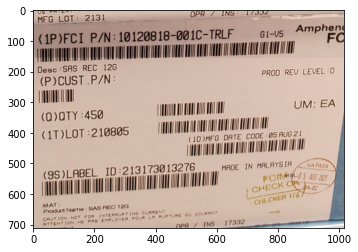

In [15]:
%matplotlib inline
plt.imshow(sticker_list[0][:,:,::-1])
plt.show()

In [18]:
a = sticker_list[0][:,:,::-1]
cv2.imwrite('a.jpg',a)

True

In [17]:
pwd

'C:\\Users\\Quadrep\\Desktop\\yolov5-tinymetal'